In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 


In [116]:
filepaths = []
df_names = ["A(10)", "B(9+1)", "C(8+2)", "D(7+3)","E(6+4)","F(5+5)"]
dataframes = {"A(10)":None, "B(9+1)":None, "C(8+2)":None, "D(7+3)":None,"E(6+4)":None,"F(5+5)":None}
dataframes_groupby = {"A(10)":None, "B(9+1)":None, "C(8+2)":None, "D(7+3)":None,"E(6+4)":None, "F(5+5)":None}

In [117]:
for idx, filepath in enumerate(filepaths) :
    with open(filepath) as f:
        d = json.load(f)

    df_data = {
        "transaction_id" : [],
        "winner_provider_id" : [],
        "price_provider" : [],
        "price_consumer" : [],
        "avg_uplink" : [],
        "avg_downlink" : []
    }

    for key in d:
        df_data["transaction_id"].append(key)
        df_data["winner_provider_id"].append(d[key]["flow_metrics"]["provider_info"]["provider_id"])
        df_data["price_provider"].append(d[key]["flow_metrics"]["price"])
        df_data["price_consumer"].append(d[key]["flow_metrics"]["price_consumer"])
        df_data["avg_uplink"].append(d[key]["flow_metrics"]["average_uplink"])
        df_data["avg_downlink"].append(d[key]["flow_metrics"]["average_downlink"])


    df = pd.DataFrame(df_data)

    df["price_provider_expanding_mean"] = df.iloc[:,2].expanding().mean()
    df["price_consumer_expanding_mean"] = df.iloc[:,3].expanding().mean()
    df["uplink_expanding_mean"] = df.iloc[:,4].expanding().mean()
    df["downlink_expanding_mean"] = df.iloc[:,5].expanding().mean()
    
    dataframes[df_names[idx]] = df

    dfg = df.groupby(["winner_provider_id"]).size().drop("", errors="ignore")
    dataframes_groupby[df_names[idx]] = dfg
    print(dfg.index)

Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4',
       'mock-id-5', 'mock-id-6', 'mock-id-7'],
      dtype='object', name='winner_provider_id')
Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4',
       'mock-id-5', 'mock-id-6', 'mock-id-7', 'mock-id-8', 'mock-id-9'],
      dtype='object', name='winner_provider_id')
Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4',
       'mock-id-5', 'mock-id-6', 'mock-id-7', 'mock-id-8'],
      dtype='object', name='winner_provider_id')
Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4',
       'mock-id-5', 'mock-id-6', 'mock-id-7', 'mock-id-8', 'mock-id-9'],
      dtype='object', name='winner_provider_id')
Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4',
       'mock-id-5', 'mock-id-6', 'mock-id-7', 'mock-id-8', 'mock-id-9'],
      dtype='object', name='winner_provider_id')
Index(['mock-id-0', 'mock-id-1', 'mock-id-2', 'mock-id-3', 'mock-id-4

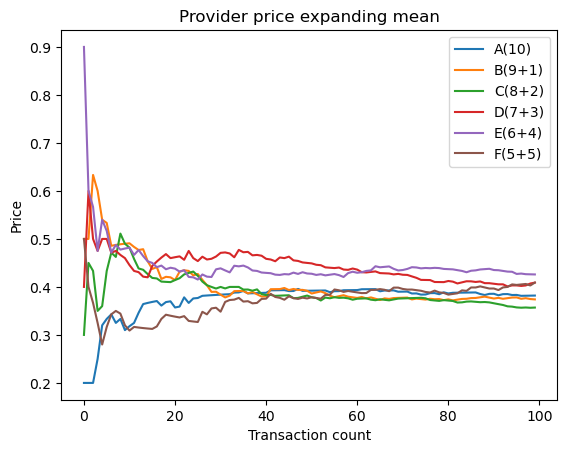

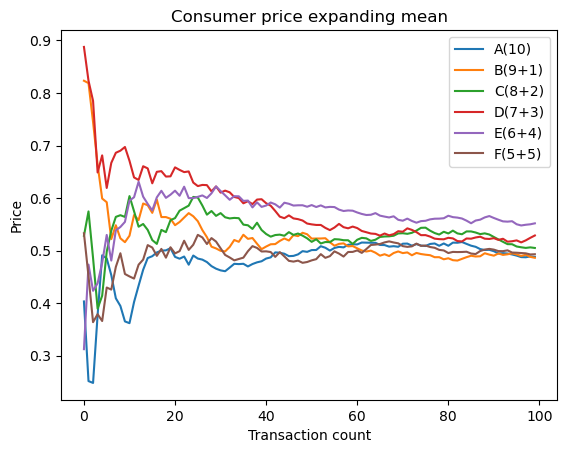

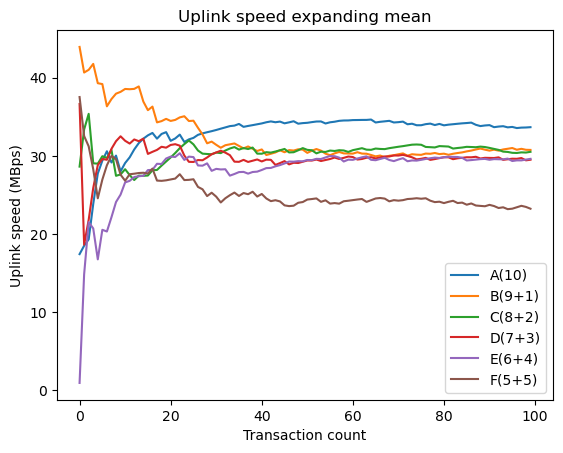

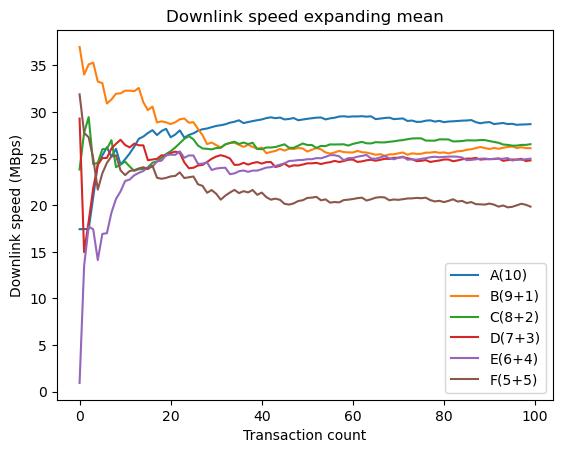

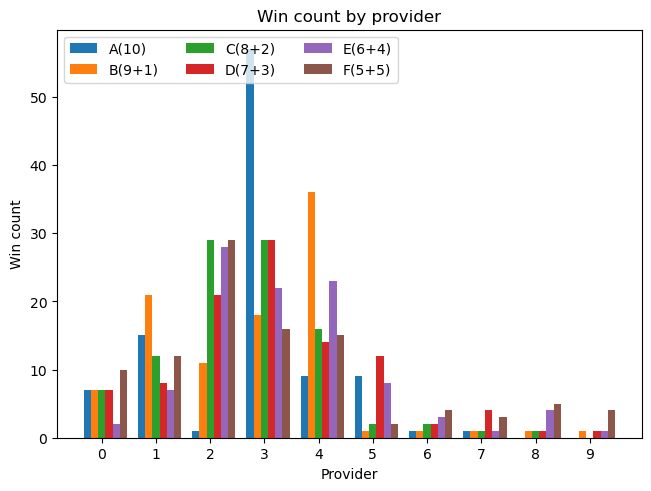

In [118]:
y_labels = ["Price", "Price", "Uplink speed (MBps)", "Downlink speed (MBps)"]
titles = ["Provider price expanding mean", "Consumer price expanding mean", 
          "Uplink speed expanding mean", "Downlink speed expanding mean"]
for idx, col_name in enumerate(["price_provider_expanding_mean", "price_consumer_expanding_mean", 
                 "uplink_expanding_mean", "downlink_expanding_mean"]):
    for df_name in dataframes:
        plt.title(titles[idx])
        plt.plot(dataframes[df_name][col_name], label=df_name)
        plt.legend(loc='best')
        plt.ylabel(y_labels[idx])
        plt.xlabel("Transaction count")
    plt.show()

width = 0.8/len(dataframes_groupby)  # the width of the bars
multiplier = -1

fig, ax = plt.subplots(layout='constrained')
for df_name in dataframes:
    x = np.arange(len(dataframes_groupby[df_name]))
    offset = width * multiplier
    rects = ax.bar(x+offset, dataframes_groupby[df_name], width, label=df_name)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win count')
ax.set_xlabel('Provider')
ax.set_title('Win count by provider')
ax.set_xticks(x + width, ["0","1","2","3","4","5","6","7","8","9"])
ax.legend(loc='upper left', ncols=3)
# ax.set_ylim(0, 100)

plt.show()